In [7]:
from sklearn import datasets, model_selection

In [8]:
X, y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)
X
# y

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)



In [10]:
X_validation, X_test, y_validation, y_test = model_selection.train_test_split(
    X_test, y_test, test_size=0.5
)

X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15730,2.9792,49.0,4.113553,1.075092,1277.0,2.338828,37.78,-122.43
14720,4.1162,27.0,6.334225,0.989305,927.0,2.478610,32.80,-117.02
6432,4.5491,43.0,5.984848,1.045455,657.0,3.318182,34.12,-118.01
9769,2.7153,22.0,4.736246,1.030744,2546.0,4.119741,36.43,-121.32
12478,1.6116,52.0,3.706250,1.065625,1038.0,3.243750,38.59,-121.48
...,...,...,...,...,...,...,...,...
18907,4.0156,34.0,5.471591,0.903409,392.0,2.227273,38.14,-122.26
7378,2.0819,43.0,4.099698,1.054381,1657.0,5.006042,33.97,-118.24
16231,3.0625,47.0,5.470113,1.071082,1228.0,1.983845,37.98,-121.31
12724,4.7750,36.0,6.707865,1.036517,838.0,2.353933,38.59,-121.37


In [133]:
print(X_train.shape, y_train.shape)

(14448, 8) (14448,)


In [11]:
# Create a class called LinearRegression. The class should have two methods - the class constructor, which needs to randomly assign initial weights for each feature, and set a random seed for reproducibility. A method called __call__ that runs when we call an instance of the class on some data, and returns a prediction based on the features in X.

import numpy as np


class LinearRegression:
    def __init__(self, n_features: int): # initalise parameters
        np.random.seed(10)
        self.W = np.random.randn(n_features, 1) ## randomly initialise weight
        self.b = np.random.randn(1) ## randomly initialise bias

    def __call__(self, X): # how do we calculate the output from an input in our model?
        ypred = np.dot(X, self.W) + self.b
        return ypred # return prediction
    
    def update_params(self, W, b):
        self.W = W ## set this instance's weights to the new weight value passed to the function
        self.b = b ## do the same for the bias


    

In [12]:
# Create an instance of LinearRegression and use it to get the predictions based on the initial weights. 
# Print the first 10 examples. Now print the first 10 actual values of y. What do you notice?

model = LinearRegression(n_features=8) 
y_pred = model(X_test)
print("Predictions:\n", y_pred[:10])
y_pred.shape

Predictions:
 [[ 821.15723831]
 [ 585.20076171]
 [ 429.63885978]
 [1587.48635159]
 [ 673.27878959]
 [ 470.42991532]
 [ 685.25281872]
 [ 437.05955887]
 [1412.66081787]
 [ 772.20692644]]


(3096, 1)

In [89]:
import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

/var/folders/h9/jzhyvg6x4k51g8lzv6t0h8vr0000gn/T/ipykernel_74801/197218023.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plot_predictions(y_pred[:10], y_test[:10])


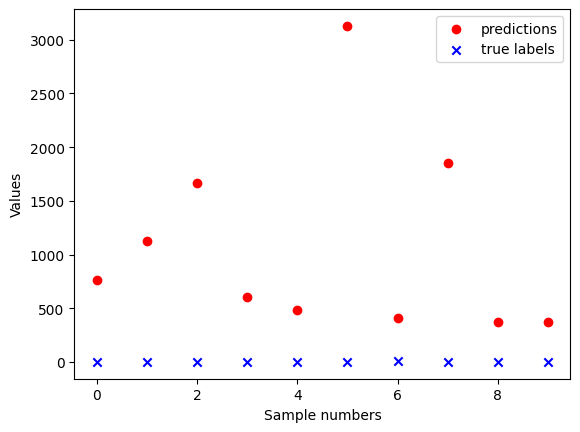

In [90]:
plot_predictions(y_pred[:10], y_test[:10])

In [141]:
y_pred.shape

(323, 1)

In [123]:
type(y_pred)

numpy.ndarray

In [135]:
y_train.shape

(14448,)

In [136]:
type(y_train)

pandas.core.series.Series

In [137]:
y_train.to_numpy()

array([1.453, 1.411, 1.58 , ..., 1.833, 2.45 , 1.228])

In [140]:
y_train.shape

(14448,)

In [21]:
y_pred = y_pred.flatten()

In [22]:
y_pred.shape

(3096,)

In [13]:
    
def mean_squared_error(y_pred, y_true):  # define our criterion (loss function)
    errors = y_pred - y_true  ## calculate errors
    squared_errors = errors ** 2  ## square errors
    return np.mean(squared_errors)




In [23]:
cost = mean_squared_error(y_pred, y_test)


In [24]:
cost

1298087.633826187

In [ ]:
# Use scikit-learn to create a linear regression model 
# for the house prices in the California dataset, this time using scikit-learn's linear model.



In [ ]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split


class Linear_model:
    def __init__(self): 
        self.model = model
        
    def fit(X, y):
        self.model. 



    
      

class
X, y = datasets.fetch_california_housing(return_X_y=True)

model = linear_model.LinearRegression()

In [1]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_california_housing(return_X_y=True)

model = linear_model.LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)

print(y_pred[:5], "\n", y[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744] 
 [4.526 3.585 3.521 3.413 3.422]


In [3]:
from sklearn import metrics

metrics.mean_squared_error(y, y_pred)

0.5243209861846072

## Validation & Testing

In [43]:
# Download the diabetes dataset using the sklearn.datasets module.

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)


print(f"Number of samples in dataset: {len(X)}")





Number of samples in dataset: 442


In [51]:
# Use the train_test_split function from sklearn to split
# the diabetes dataset into a train set and a validation set.

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")





Number of samples in:
    Training: 309
    Testing: 133


In [52]:
X_validation, X_test, y_validation, y_test = model_selection.train_test_split(X_test, y_test, test_size=0.3)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Validation: {len(y_validation)}")
print(f"    Testing: {len(y_test)}")

Number of samples in:
    Training: 309
    Validation: 93
    Testing: 40
